# Exploratory Data Analysis - Kickstarter Projects

This notebook explores the Kickstarter project datasets to understand:
- Data structure and quality
- Project success rates
- Funding patterns
- Category and country distributions
- Temporal trends


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


## 1. Load Data


In [2]:
# Define data paths
data_dir = Path('../../data/raw')
file_201612 = data_dir / 'ks-projects-201612.csv'
file_201801 = data_dir / 'ks-projects-201801.csv'

# Load datasets with encoding handling
print("Loading datasets...")

# Try different encodings if UTF-8 fails
encodings = ['utf-8', 'latin-1', 'ISO-8859-1', 'cp1252']

def load_csv_with_encoding(file_path):
    """Try to load CSV with different encodings"""
    for encoding in encodings:
        try:
            df = pd.read_csv(file_path, encoding=encoding, low_memory=False)
            print(f"Successfully loaded {file_path.name} with {encoding} encoding")
            return df
        except UnicodeDecodeError:
            continue
    # If all encodings fail, try with encoding_errors parameter (pandas 1.3+)
    try:
        print(f"Warning: Using utf-8 with encoding_errors='replace' for {file_path.name}")
        return pd.read_csv(file_path, encoding='utf-8', encoding_errors='replace', low_memory=False)
    except TypeError:
        # Fallback for older pandas versions - use latin-1 which can read any byte
        print(f"Warning: Using latin-1 encoding for {file_path.name} (fallback)")
        return pd.read_csv(file_path, encoding='latin-1', low_memory=False)

df_201612 = load_csv_with_encoding(file_201612)
df_201801 = load_csv_with_encoding(file_201801)

print(f"\n201612 dataset shape: {df_201612.shape}")
print(f"201801 dataset shape: {df_201801.shape}")


Loading datasets...
Successfully loaded ks-projects-201612.csv with latin-1 encoding
Successfully loaded ks-projects-201801.csv with utf-8 encoding

201612 dataset shape: (323750, 17)
201801 dataset shape: (378661, 15)


## 2. Data Overview


In [3]:
# Display column names and basic info
print("=" * 60)
print("201612 Dataset Columns:")
print("=" * 60)
print(df_201612.columns.tolist())
print(f"\nNumber of columns: {len(df_201612.columns)}")

print("\n" + "=" * 60)
print("201801 Dataset Columns:")
print("=" * 60)
print(df_201801.columns.tolist())
print(f"\nNumber of columns: {len(df_201801.columns)}")


201612 Dataset Columns:
['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ', 'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ', 'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']

Number of columns: 17

201801 Dataset Columns:
['ID', 'name', 'category', 'main_category', 'currency', 'deadline', 'goal', 'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']

Number of columns: 15


In [4]:
# Display first few rows
print("=" * 60)
print("201612 Dataset - First 5 rows:")
print("=" * 60)
df_201612.head()


201612 Dataset - First 5 rows:


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [5]:
print("=" * 60)
print("201801 Dataset - First 5 rows:")
print("=" * 60)
df_201801.head()


201801 Dataset - First 5 rows:


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## 3. Data Cleaning and Preparation


In [6]:
# Clean column names (remove spaces)
df_201612.columns = df_201612.columns.str.strip()
df_201801.columns = df_201801.columns.str.strip()

# Drop unnamed columns from 201612 dataset
unnamed_cols = [col for col in df_201612.columns if 'Unnamed' in col]
if unnamed_cols:
    print(f"Dropping {len(unnamed_cols)} unnamed columns from 201612 dataset")
    df_201612 = df_201612.drop(columns=unnamed_cols)

# Check for missing values
print("=" * 60)
print("Missing Values - 201612 Dataset:")
print("=" * 60)
missing_201612 = df_201612.isnull().sum()
print(missing_201612[missing_201612 > 0])

print("\n" + "=" * 60)
print("Missing Values - 201801 Dataset:")
print("=" * 60)
missing_201801 = df_201801.isnull().sum()
print(missing_201801[missing_201801 > 0])


Dropping 4 unnamed columns from 201612 dataset
Missing Values - 201612 Dataset:
name              4
category          5
usd pledged    3790
dtype: int64

Missing Values - 201801 Dataset:
name              4
usd pledged    3797
dtype: int64


In [7]:
# Convert date columns first to check date ranges
df_201612['launched'] = pd.to_datetime(df_201612['launched'], errors='coerce')
df_201612['deadline'] = pd.to_datetime(df_201612['deadline'], errors='coerce')
df_201801['launched'] = pd.to_datetime(df_201801['launched'], errors='coerce')
df_201801['deadline'] = pd.to_datetime(df_201801['deadline'], errors='coerce')

# Combine datasets - use the more complete 201801 dataset as primary
# Check if we should merge or use separately
print("=" * 60)
print("Dataset Comparison:")
print("=" * 60)
valid_dates_201612 = df_201612['launched'].dropna()
valid_dates_201801 = df_201801['launched'].dropna()

if len(valid_dates_201612) > 0:
    print(f"201612 date range: {valid_dates_201612.min()} to {valid_dates_201612.max()}")
    print(f"201612 valid dates: {len(valid_dates_201612)}/{len(df_201612)} ({len(valid_dates_201612)/len(df_201612)*100:.1f}%)")
else:
    print("201612: No valid dates found")

if len(valid_dates_201801) > 0:
    print(f"201801 date range: {valid_dates_201801.min()} to {valid_dates_201801.max()}")
    print(f"201801 valid dates: {len(valid_dates_201801)}/{len(df_201801)} ({len(valid_dates_201801)/len(df_201801)*100:.1f}%)")
else:
    print("201801: No valid dates found")

# Use the more recent dataset (201801) which has more complete columns
df = df_201801.copy()
print(f"\nUsing 201801 dataset with {len(df)} rows")


Dataset Comparison:
201612 date range: 1970-01-01 01:00:00 to 2016-12-06 10:18:31
201612 valid dates: 323126/323750 (99.8%)
201801 date range: 1970-01-01 01:00:00 to 2018-01-02 15:02:31
201801 valid dates: 378661/378661 (100.0%)

Using 201801 dataset with 378661 rows


In [ ]:
# Check for projects with inconsistent data
print("=" * 60)
print("DATA QUALITY SUMMARY:")
print("=" * 60)

# Create flags for data quality issues
df['has_zero_backers'] = df['backers'] == 0
df['has_zero_pledged'] = df['usd_pledged_real'] == 0
df['has_zero_goal'] = df['usd_goal_real'] == 0
# Only check invalid duration if the column exists (created in Cell 16)
if 'campaign_duration_days' in df.columns:
    df['has_invalid_duration'] = df['campaign_duration_days'] <= 0
else:
    df['has_invalid_duration'] = False  # Set to False if column doesn't exist yet
df['has_data_inconsistency'] = ((df['usd_pledged_real'] > 0) & (df['backers'] == 0)) | \
                                 ((df['state'] == 'successful') & (df['usd_pledged_real'] == 0))

total_issues = df['has_data_inconsistency'].sum()
print(f"\nProjects with data inconsistencies: {total_issues:,} ({total_issues/len(df)*100:.2f}%)")

# Show breakdown
if total_issues > 0:
    print("\nBreakdown of inconsistencies:")
    inconsistent = df[df['has_data_inconsistency']]
    print(f"  - Pledged > 0 but backers = 0: {((inconsistent['usd_pledged_real'] > 0) & (inconsistent['backers'] == 0)).sum():,}")
    print(f"  - Successful but pledged = 0: {((inconsistent['state'] == 'successful') & (inconsistent['usd_pledged_real'] == 0)).sum():,}")


DATA QUALITY SUMMARY:

Projects with data inconsistencies: 3,082 (0.81%)

Breakdown of inconsistencies:
  - Pledged > 0 but backers = 0: 3,082
  - Successful but pledged = 0: 0

RECOMMENDATIONS:
1. Consider filtering out projects with zero goal amounts (invalid data)
2. Investigate projects with zero backers but pledged > 0 (data inconsistency)
3. Review successful projects with zero pledged (may need correction)
4. Filter out projects with invalid campaign durations (<= 0 days)
5. Zero backers/pledged is expected for failed projects, but should be investigated for other states


In [9]:
# Dates are already converted, but filter out invalid dates
# Filter out dates before 2009 (Kickstarter started in 2009) and after 2018
# Also filter out the default Unix epoch date (1970-01-01)
min_valid_date = pd.Timestamp('2009-01-01')
max_valid_date = pd.Timestamp('2018-12-31')

# Count invalid dates before filtering
invalid_dates = ((df['launched'] < min_valid_date) | (df['launched'] > max_valid_date) | df['launched'].isna()).sum()
print(f"Invalid dates (before 2009, after 2018, or NaN): {invalid_dates} ({invalid_dates/len(df)*100:.2f}%)")

# Create derived features
df['campaign_duration_days'] = (df['deadline'] - df['launched']).dt.days
df['year_launched'] = df['launched'].dt.year
df['month_launched'] = df['launched'].dt.month
df['day_of_week'] = df['launched'].dt.day_name()

# Calculate funding ratio (pledged / goal)
df['funding_ratio'] = df['usd_pledged_real'] / df['usd_goal_real']
df['funding_ratio'] = df['funding_ratio'].replace([np.inf, -np.inf], np.nan)

# Filter to valid date range for analysis
df_valid_dates = df[(df['launched'] >= min_valid_date) & (df['launched'] <= max_valid_date)].copy()

print(f"\nDate conversions and derived features created.")
print(f"Original dataset: {len(df)} rows")
print(f"Valid date range: {df_valid_dates['launched'].min()} to {df_valid_dates['launched'].max()}")
print(f"Rows with valid dates: {len(df_valid_dates)} ({len(df_valid_dates)/len(df)*100:.1f}%)")

# Use df_valid_dates for the rest of the analysis
df = df_valid_dates.copy()


Invalid dates (before 2009, after 2018, or NaN): 7 (0.00%)

Date conversions and derived features created.
Original dataset: 378661 rows
Valid date range: 2009-04-21 21:02:48 to 2018-01-02 15:02:31
Rows with valid dates: 378654 (100.0%)


## 4. Basic Statistics


In [10]:
# Basic info about the dataset
print("=" * 60)
print("Dataset Info:")
print("=" * 60)
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 378654 entries, 0 to 378660
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ID                      378654 non-null  int64         
 1   name                    378650 non-null  object        
 2   category                378654 non-null  object        
 3   main_category           378654 non-null  object        
 4   currency                378654 non-null  object        
 5   deadline                378654 non-null  datetime64[ns]
 6   goal                    378654 non-null  float64       
 7   launched                378654 non-null  datetime64[ns]
 8   pledged                 378654 non-null  float64       
 9   state                   378654 non-null  object        
 10  backers                 378654 non-null  int64         
 11  country                 378654 non-null  object        
 12  usd pledged          

In [11]:
# Statistical summary for numerical columns
print("=" * 60)
print("Numerical Summary Statistics:")
print("=" * 60)
numerical_cols = ['goal', 'pledged', 'backers', 'usd_goal_real', 'usd_pledged_real', 
                  'campaign_duration_days', 'funding_ratio']
df[numerical_cols].describe()


Numerical Summary Statistics:


,goal,pledged,backers,usd_goal_real,usd_pledged_real,campaign_duration_days,funding_ratio
count,3.786540e+05,3.786540e+05,378654.000000,3.786540e+05,3.786540e+05,378654.000000,378654.000000
mean,4.908160e+04,9.683158e+03,105.619428,4.545514e+04,9.059092e+03,33.203421,3.236180
std,1.183402e+06,9.563688e+04,907.193306,1.152961e+06,9.097418e+04,12.793167,266.907872
min,1.000000e-02,0.000000e+00,0.000000,1.000000e-02,0.000000e+00,0.000000,0.000000
25%,2.000000e+03,3.000000e+01,2.000000,2.000000e+03,3.100000e+01,29.000000,0.004533
50%,5.200000e+03,6.200000e+02,12.000000,5.500000e+03,6.244650e+02,29.000000,0.134667
75%,1.600000e+04,4.076000e+03,56.000000,1.550000e+04,4.050000e+03,36.000000,1.065400
max,1.000000e+08,2.033899e+07,219382.000000,1.663614e+08,2.033899e+07,91.000000,104277.890000


In [12]:
# Project states distribution
print("=" * 60)
print("Project States Distribution:")
print("=" * 60)
state_counts = df['state'].value_counts()
print(state_counts)
print(f"\nSuccess rate: {(df['state'] == 'successful').sum() / len(df) * 100:.2f}%")


Project States Distribution:
state
failed        197719
successful    133956
canceled       38773
undefined       3562
live            2799
suspended       1845
Name: count, dtype: int64

Success rate: 35.38%


In [13]:
# Numerical values that are zero
numerical_cols = ['goal', 'pledged', 'backers', 'usd_goal_real', 'usd_pledged_real', 
                      'campaign_duration_days', 'funding_ratio']

zero_counts = df[numerical_cols].eq(0).sum()
print("=" * 60)
print("Number of Zero Values in Each Numerical Column:")
print("=" * 60)
print(zero_counts)
print("\nColumns with the most zeros:")
print(zero_counts.sort_values(ascending=False))


Number of Zero Values in Each Numerical Column:
goal                          0
pledged                   52520
backers                   55602
usd_goal_real                 0
usd_pledged_real          52520
campaign_duration_days      102
funding_ratio             52520
dtype: int64

Columns with the most zeros:
backers                   55602
pledged                   52520
usd_pledged_real          52520
funding_ratio             52520
campaign_duration_days      102
goal                          0
usd_goal_real                 0
dtype: int64


## 5. Visualizations


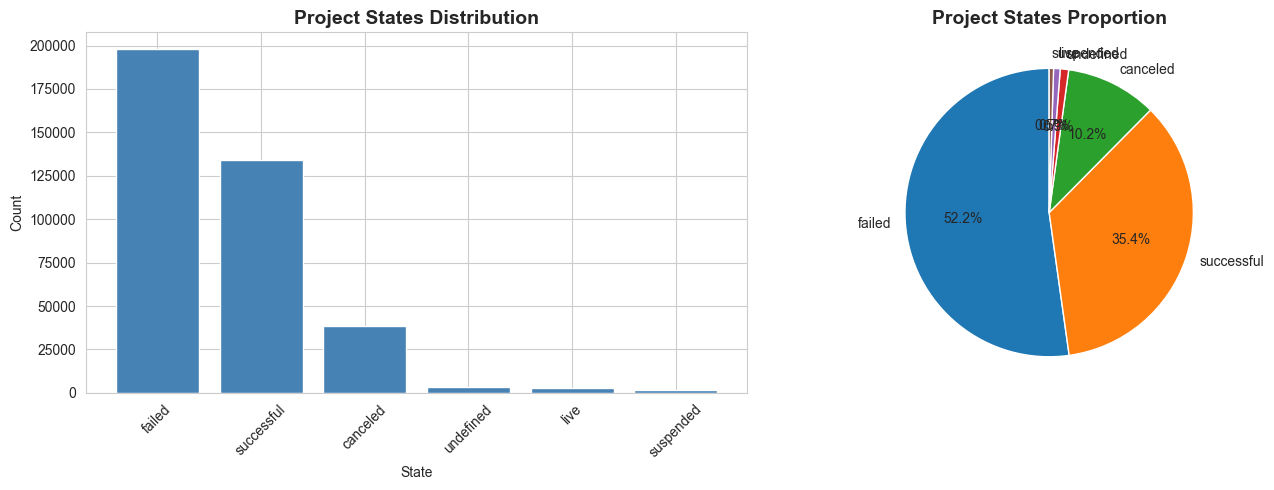

In [14]:
# 1. Project States Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
state_counts = df['state'].value_counts()
axes[0].bar(state_counts.index, state_counts.values, color='steelblue')
axes[0].set_title('Project States Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
axes[1].pie(state_counts.values, labels=state_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Project States Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


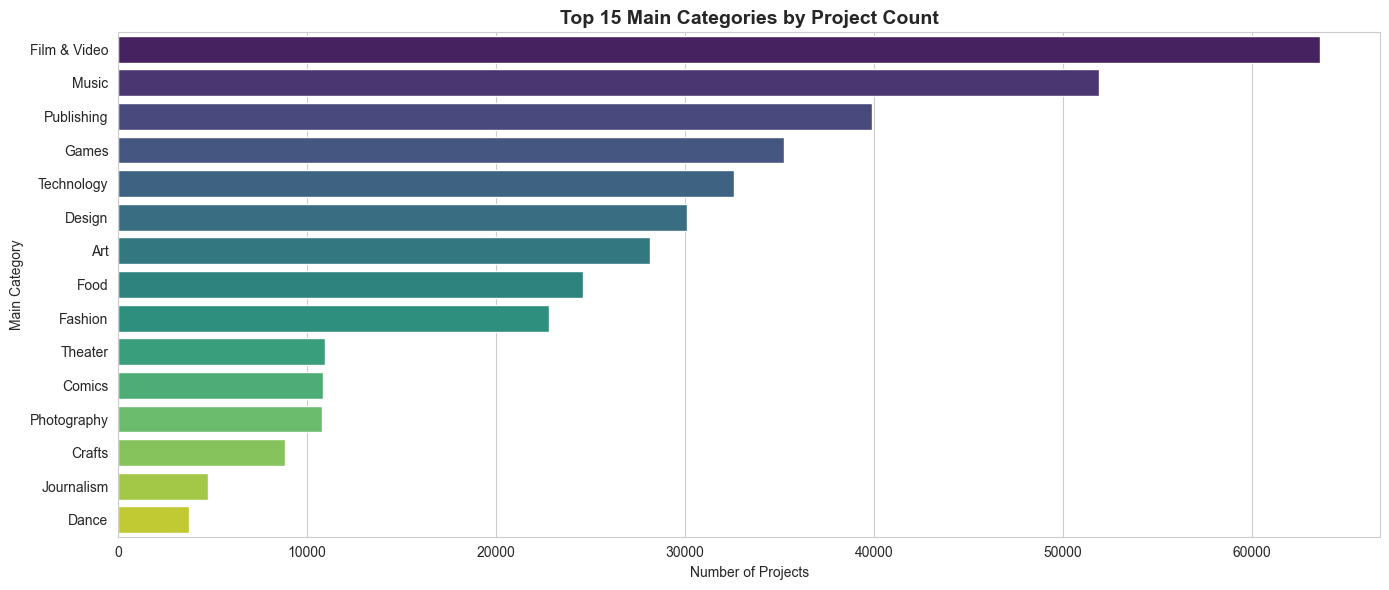

In [15]:
# 2. Main Categories Distribution
plt.figure(figsize=(14, 6))
category_counts = df['main_category'].value_counts().head(15)
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Top 15 Main Categories by Project Count', fontsize=14, fontweight='bold')
plt.xlabel('Number of Projects')
plt.ylabel('Main Category')
plt.tight_layout()
plt.show()


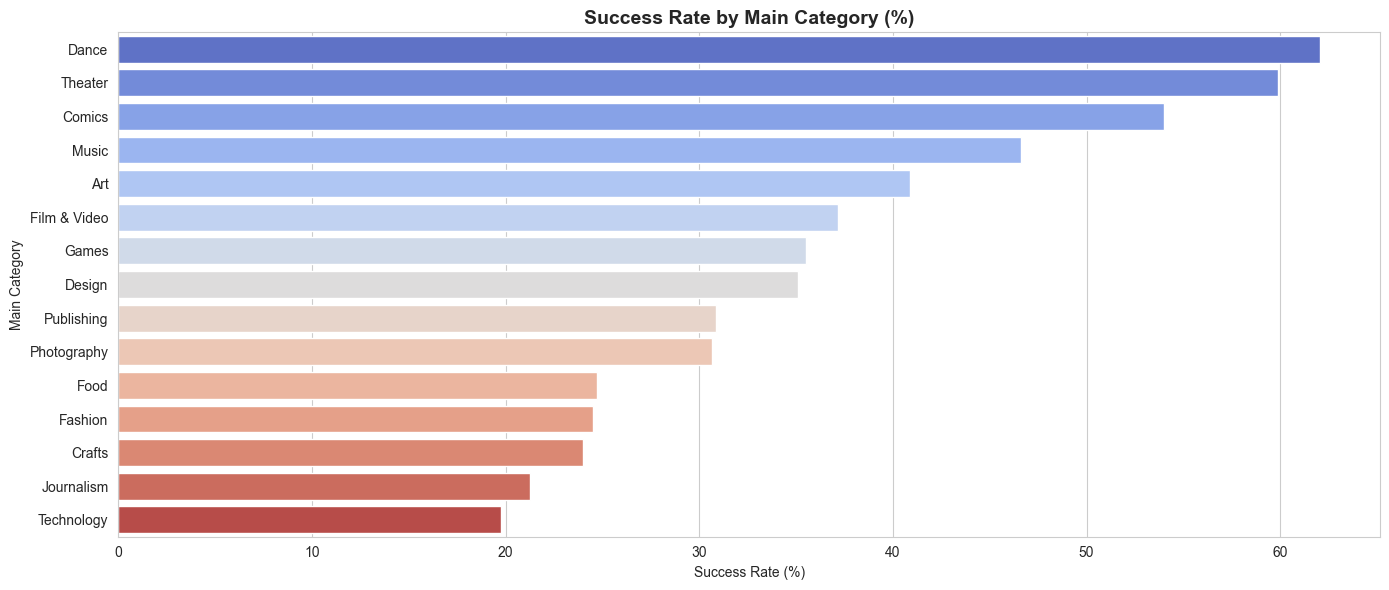

In [16]:
# 3. Success Rate by Main Category
category_success = df.groupby('main_category')['state'].apply(
    lambda x: (x == 'successful').sum() / len(x) * 100
).sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=category_success.values, y=category_success.index, palette='coolwarm')
plt.title('Success Rate by Main Category (%)', fontsize=14, fontweight='bold')
plt.xlabel('Success Rate (%)')
plt.ylabel('Main Category')
plt.tight_layout()
plt.show()


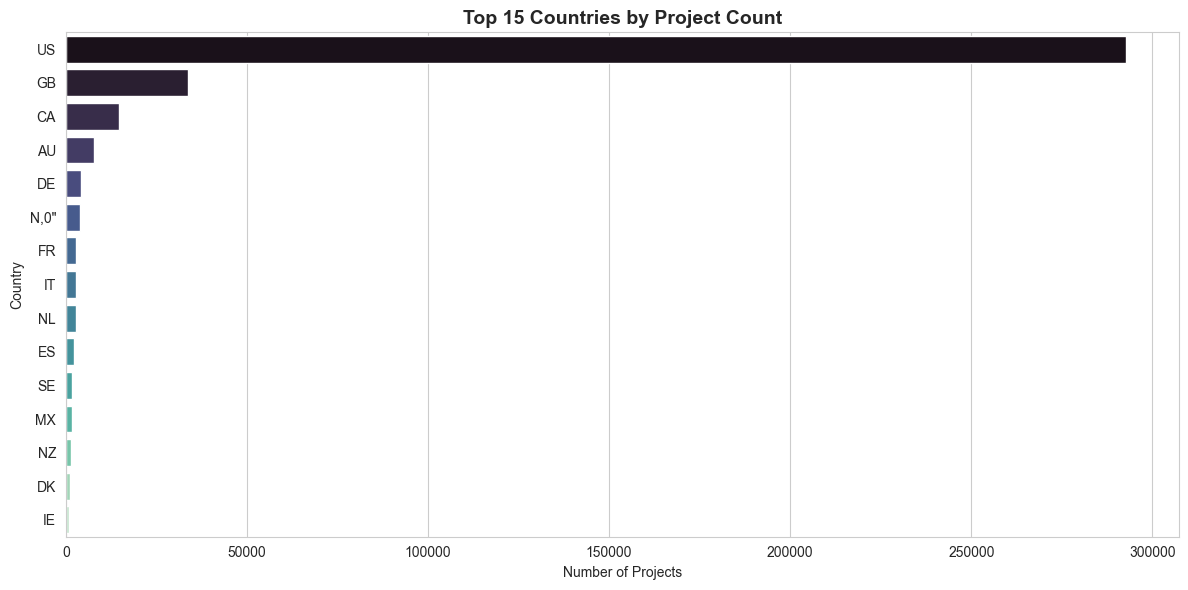

In [17]:
# 4. Top Countries by Project Count
plt.figure(figsize=(12, 6))
country_counts = df['country'].value_counts().head(15)
sns.barplot(x=country_counts.values, y=country_counts.index, palette='mako')
plt.title('Top 15 Countries by Project Count', fontsize=14, fontweight='bold')
plt.xlabel('Number of Projects')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


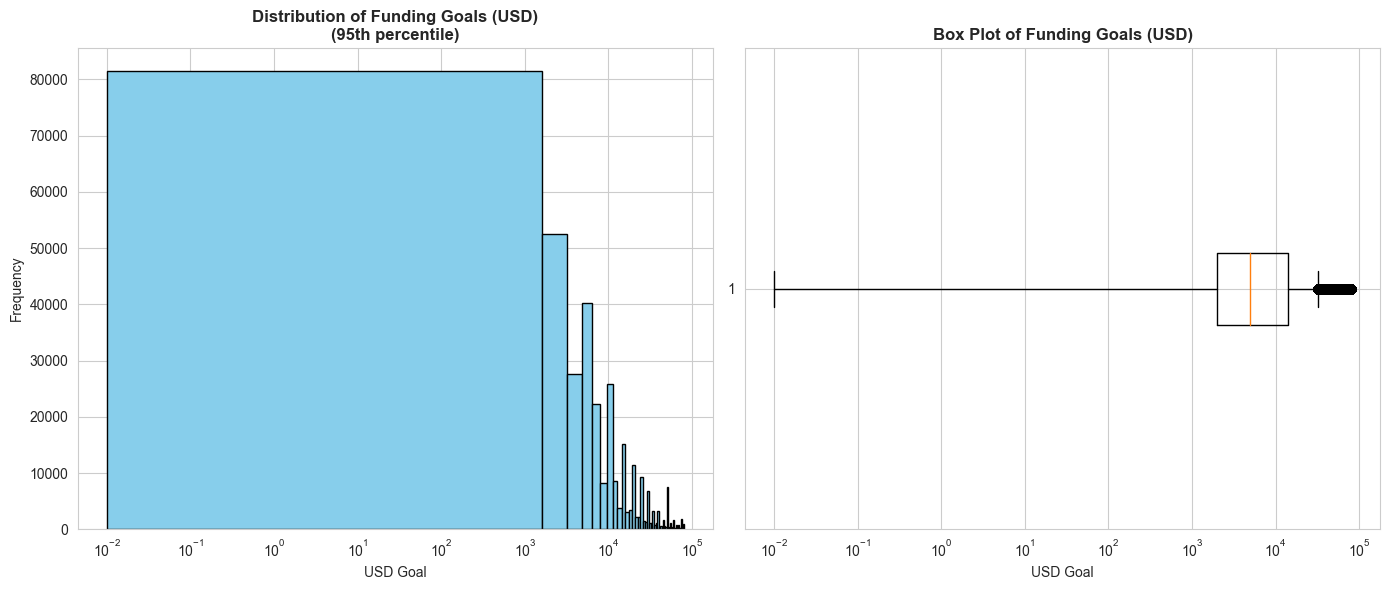

Median goal: $5,500.00
Mean goal: $45,455.14


In [18]:
# 5. Distribution of Funding Goals (USD)
plt.figure(figsize=(14, 6))

# Filter out extreme outliers for better visualization
df_clean = df[df['usd_goal_real'] <= df['usd_goal_real'].quantile(0.95)]

plt.subplot(1, 2, 1)
plt.hist(df_clean['usd_goal_real'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Funding Goals (USD)\n(95th percentile)', fontsize=12, fontweight='bold')
plt.xlabel('USD Goal')
plt.ylabel('Frequency')
plt.xscale('log')

plt.subplot(1, 2, 2)
plt.boxplot(df_clean['usd_goal_real'], vert=False)
plt.title('Box Plot of Funding Goals (USD)', fontsize=12, fontweight='bold')
plt.xlabel('USD Goal')
plt.xscale('log')

plt.tight_layout()
plt.show()

print(f"Median goal: ${df['usd_goal_real'].median():,.2f}")
print(f"Mean goal: ${df['usd_goal_real'].mean():,.2f}")


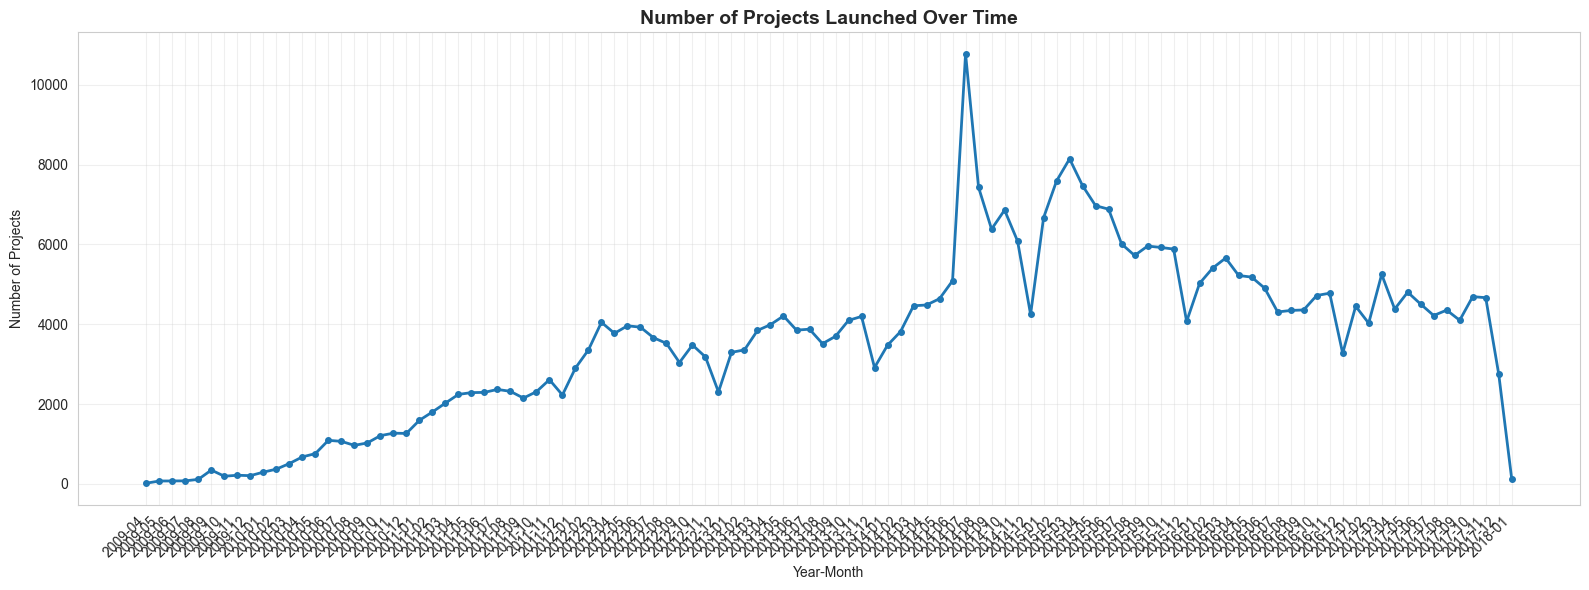

In [19]:
# 6. Projects Launched Over Time
df_time = df.dropna(subset=['launched'])
df_time['year_month'] = df_time['launched'].dt.to_period('M')

monthly_counts = df_time['year_month'].value_counts().sort_index()

plt.figure(figsize=(16, 6))
plt.plot(monthly_counts.index.astype(str), monthly_counts.values, marker='o', linewidth=2, markersize=4)
plt.title('Number of Projects Launched Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


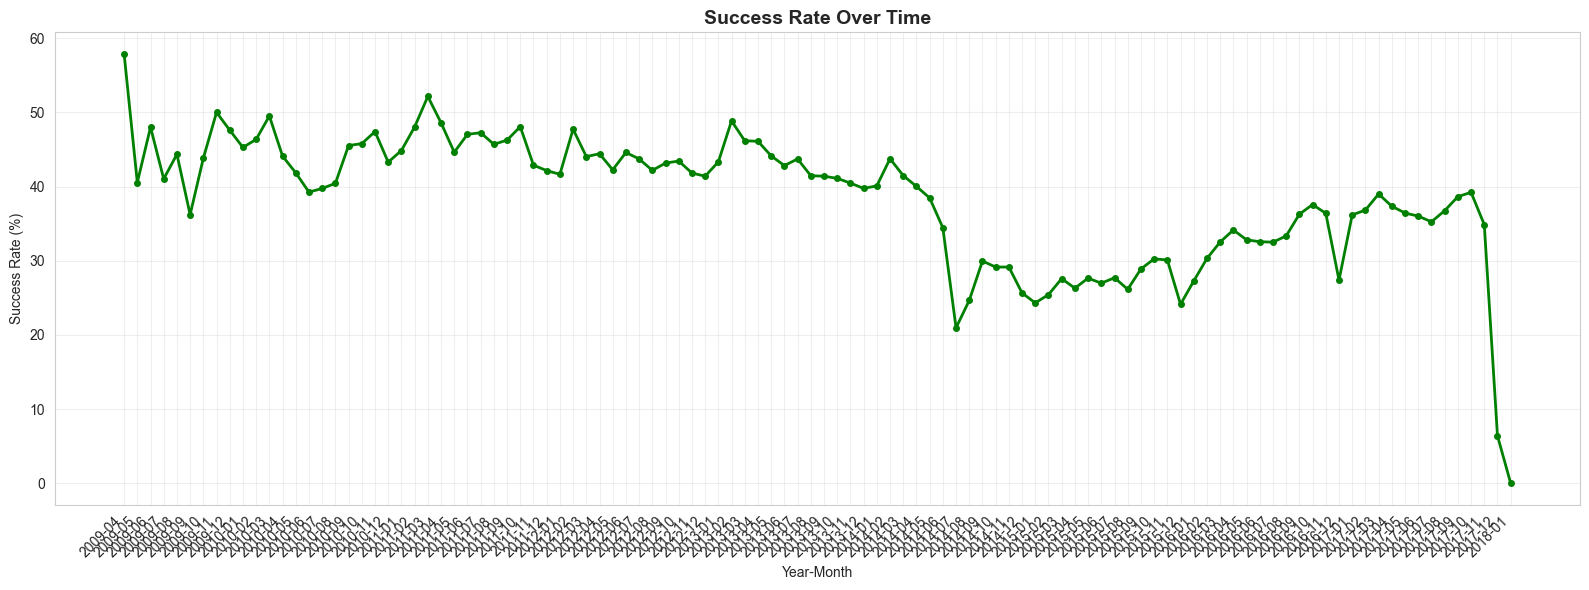

In [20]:
# 7. Success Rate Over Time
df_time_success = df_time.groupby('year_month')['state'].apply(
    lambda x: (x == 'successful').sum() / len(x) * 100
).sort_index()

plt.figure(figsize=(16, 6))
plt.plot(df_time_success.index.astype(str), df_time_success.values, 
         marker='o', linewidth=2, markersize=4, color='green')
plt.title('Success Rate Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


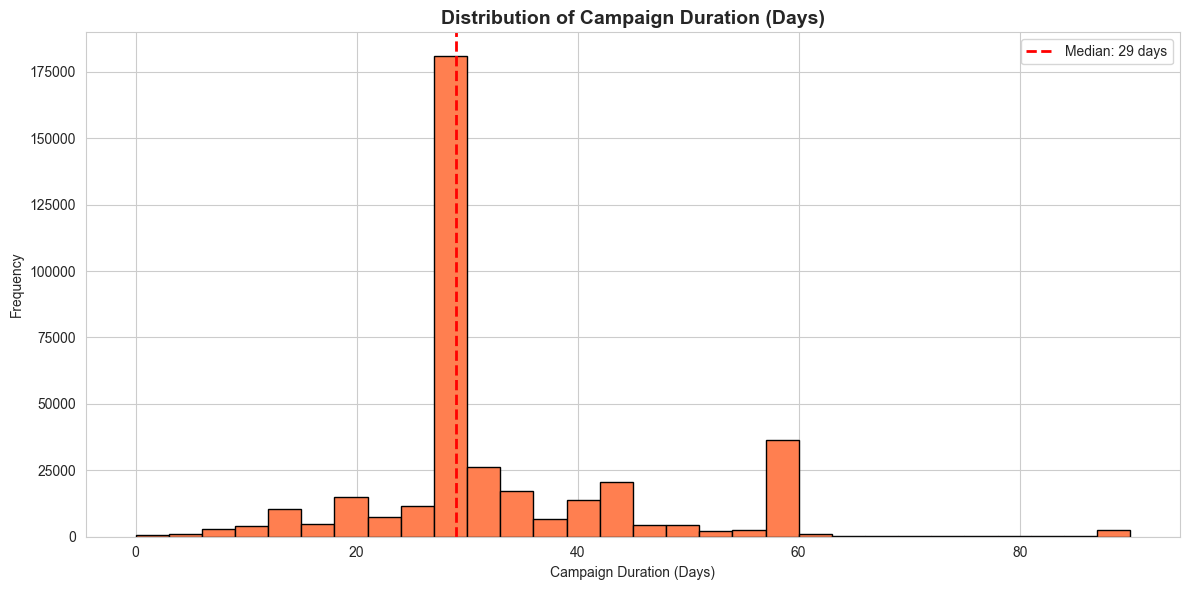

Median campaign duration: 29 days
Mean campaign duration: 33.2 days


In [21]:
# 8. Campaign Duration Distribution
df_duration = df.dropna(subset=['campaign_duration_days'])
df_duration_clean = df_duration[
    (df_duration['campaign_duration_days'] >= 0) & 
    (df_duration['campaign_duration_days'] <= 90)
]

plt.figure(figsize=(12, 6))
plt.hist(df_duration_clean['campaign_duration_days'], bins=30, color='coral', edgecolor='black')
plt.title('Distribution of Campaign Duration (Days)', fontsize=14, fontweight='bold')
plt.xlabel('Campaign Duration (Days)')
plt.ylabel('Frequency')
plt.axvline(df_duration_clean['campaign_duration_days'].median(), 
            color='red', linestyle='--', linewidth=2, label=f'Median: {df_duration_clean["campaign_duration_days"].median():.0f} days')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Median campaign duration: {df_duration_clean['campaign_duration_days'].median():.0f} days")
print(f"Mean campaign duration: {df_duration_clean['campaign_duration_days'].mean():.1f} days")


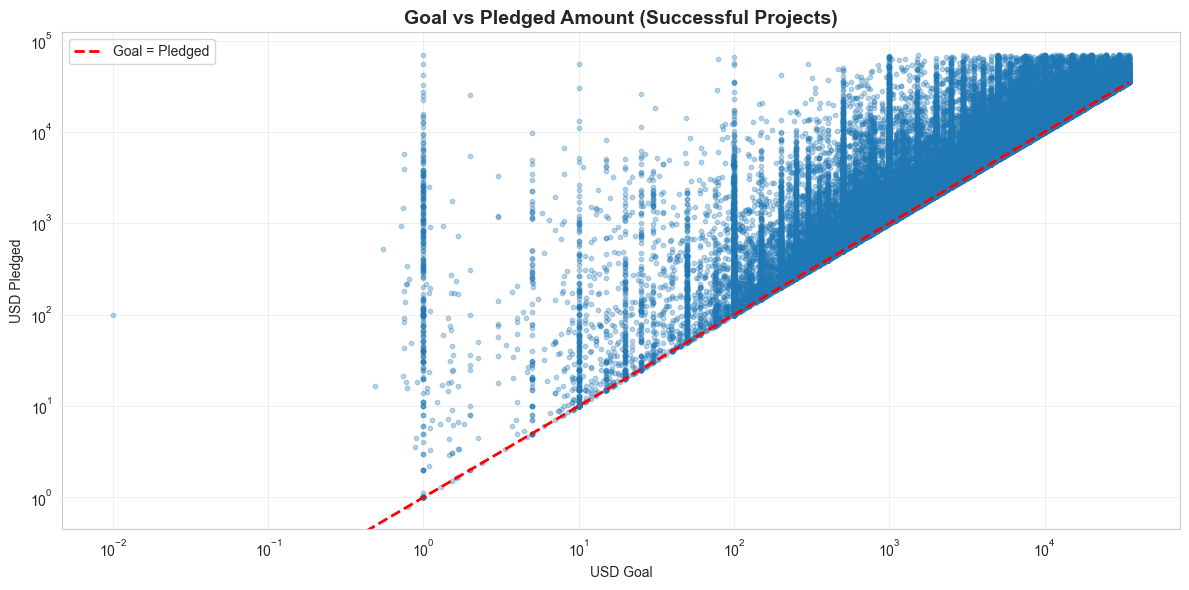

In [22]:
# 9. Relationship between Goal and Pledged Amount (for successful projects)
df_successful = df[df['state'] == 'successful'].copy()
df_successful_clean = df_successful[
    (df_successful['usd_goal_real'] <= df_successful['usd_goal_real'].quantile(0.95)) &
    (df_successful['usd_pledged_real'] <= df_successful['usd_pledged_real'].quantile(0.95))
]

plt.figure(figsize=(12, 6))
plt.scatter(df_successful_clean['usd_goal_real'], df_successful_clean['usd_pledged_real'], 
           alpha=0.3, s=10)
plt.plot([0, df_successful_clean['usd_goal_real'].max()], 
         [0, df_successful_clean['usd_goal_real'].max()], 
         'r--', linewidth=2, label='Goal = Pledged')
plt.title('Goal vs Pledged Amount (Successful Projects)', fontsize=14, fontweight='bold')
plt.xlabel('USD Goal')
plt.ylabel('USD Pledged')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


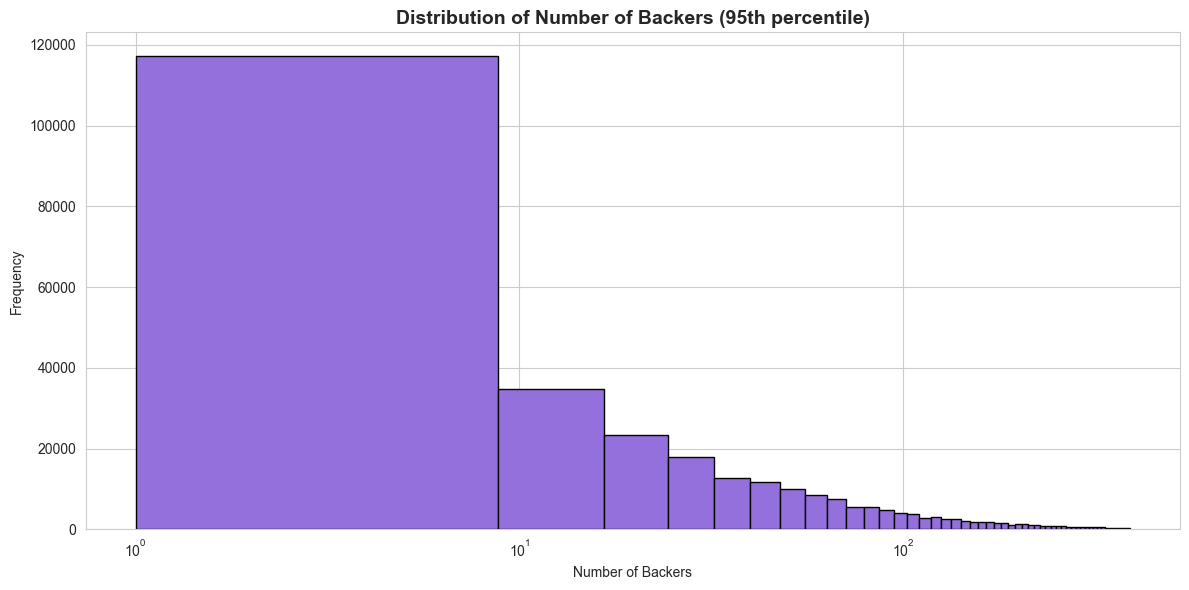

Median backers: 12
Mean backers: 105.6
Max backers: 219,382


In [23]:
# 10. Backers Distribution
df_backers = df[df['backers'] > 0].copy()
df_backers_clean = df_backers[df_backers['backers'] <= df_backers['backers'].quantile(0.95)]

plt.figure(figsize=(12, 6))
plt.hist(df_backers_clean['backers'], bins=50, color='mediumpurple', edgecolor='black')
plt.title('Distribution of Number of Backers (95th percentile)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Backers')
plt.ylabel('Frequency')
plt.xscale('log')
plt.tight_layout()
plt.show()

print(f"Median backers: {df['backers'].median():.0f}")
print(f"Mean backers: {df['backers'].mean():.1f}")
print(f"Max backers: {df['backers'].max():,}")


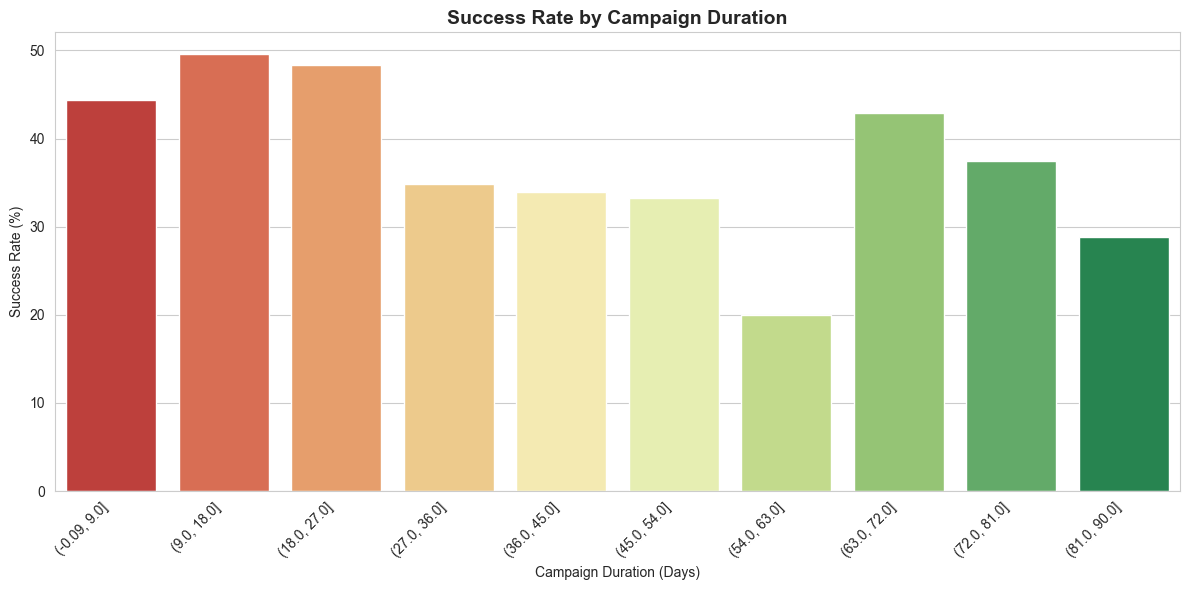

In [24]:
# 11. Success Rate by Campaign Duration
df_duration_success = df_duration_clean.groupby(
    pd.cut(df_duration_clean['campaign_duration_days'], bins=10)
)['state'].apply(lambda x: (x == 'successful').sum() / len(x) * 100)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_duration_success.index.astype(str), y=df_duration_success.values, palette='RdYlGn')
plt.title('Success Rate by Campaign Duration', fontsize=14, fontweight='bold')
plt.xlabel('Campaign Duration (Days)')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 6. Key Insights and Summary


In [25]:
# Summary statistics
print("=" * 60)
print("KEY INSIGHTS SUMMARY")
print("=" * 60)

print(f"\n1. Total Projects: {len(df):,}")
print(f"2. Successful Projects: {(df['state'] == 'successful').sum():,} ({(df['state'] == 'successful').sum() / len(df) * 100:.2f}%)")
print(f"3. Failed Projects: {(df['state'] == 'failed').sum():,} ({(df['state'] == 'failed').sum() / len(df) * 100:.2f}%)")

print(f"\n4. Top 3 Categories by Count:")
top_categories = df['main_category'].value_counts().head(3)
for cat, count in top_categories.items():
    success_rate = (df[df['main_category'] == cat]['state'] == 'successful').sum() / count * 100
    print(f"   - {cat}: {count:,} projects ({success_rate:.1f}% success rate)")

print(f"\n5. Top 3 Countries:")
top_countries = df['country'].value_counts().head(3)
for country, count in top_countries.items():
    success_rate = (df[df['country'] == country]['state'] == 'successful').sum() / count * 100
    print(f"   - {country}: {count:,} projects ({success_rate:.1f}% success rate)")

print(f"\n6. Funding Statistics:")
print(f"   - Median Goal: ${df['usd_goal_real'].median():,.2f}")
print(f"   - Median Pledged (successful): ${df[df['state'] == 'successful']['usd_pledged_real'].median():,.2f}")
print(f"   - Median Backers (successful): {df[df['state'] == 'successful']['backers'].median():.0f}")

if 'campaign_duration_days' in df.columns:
    df_dur = df.dropna(subset=['campaign_duration_days'])
    df_dur_clean = df_dur[(df_dur['campaign_duration_days'] >= 0) & (df_dur['campaign_duration_days'] <= 90)]
    print(f"\n7. Campaign Duration:")
    print(f"   - Median Duration: {df_dur_clean['campaign_duration_days'].median():.0f} days")
    print(f"   - Mean Duration: {df_dur_clean['campaign_duration_days'].mean():.1f} days")

print("\n" + "=" * 60)


KEY INSIGHTS SUMMARY

1. Total Projects: 378,654
2. Successful Projects: 133,956 (35.38%)
3. Failed Projects: 197,719 (52.22%)

4. Top 3 Categories by Count:
   - Film & Video: 63,583 projects (37.2% success rate)
   - Music: 51,917 projects (46.6% success rate)
   - Publishing: 39,873 projects (30.8% success rate)

5. Top 3 Countries:
   - US: 292,621 projects (37.4% success rate)
   - GB: 33,672 projects (35.8% success rate)
   - CA: 14,756 projects (28.0% success rate)

6. Funding Statistics:
   - Median Goal: $5,500.00
   - Median Pledged (successful): $5,107.25
   - Median Backers (successful): 71

7. Campaign Duration:
   - Median Duration: 29 days
   - Mean Duration: 33.2 days

